In [1]:
# WIP

In [2]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary (:

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [64]:
df = pd.read_csv(ZipFile('data/used-cars-database.zip').open('autos.csv'),
                encoding='Latin1', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [65]:
df.columns

new_columns = ['DateCrawled', 'Name', 'Seller', 'OfferType', 'Price', 'ABTest',
              'VehicleType', 'Year', 'Gearbox', 'PowerPS',
              'Model', 'KM', 'Month', 'FuelType', 'Brand',
              'Damage', 'DateCreated', 'Pictures', 'PostalCode',
              'LastSeen']
df.columns = new_columns
df.head()

,DateCrawled,Name,Seller,OfferType,Price,ABTest,VehicleType,Year,Gearbox,PowerPS,Model,KM,Month,FuelType,Brand,Damage,DateCreated,Pictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
DateCrawled    371528 non-null datetime64[ns]
Name           371528 non-null object
Seller         371528 non-null object
OfferType      371528 non-null object
Price          371528 non-null int64
ABTest         371528 non-null object
VehicleType    333659 non-null object
Year           371528 non-null int64
Gearbox        351319 non-null object
PowerPS        371528 non-null int64
Model          351044 non-null object
KM             371528 non-null int64
Month          371528 non-null int64
FuelType       338142 non-null object
Brand          371528 non-null object
Damage         299468 non-null object
DateCreated    371528 non-null datetime64[ns]
Pictures       371528 non-null int64
PostalCode     371528 non-null int64
LastSeen       371528 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(7), object(10)
memory usage: 56.7+ MB


In [6]:
df.describe()

,Price,Year,PowerPS,KM,Month,Pictures,PostalCode
count,"371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00"
mean,"17,295.14","2,004.58",115.55,"125,618.69",5.73,0.00,"50,820.67"
std,"3,587,953.74",92.87,192.14,"40,112.34",3.71,0.00,"25,799.08"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,150.00","1,999.00",70.00,"125,000.00",3.00,0.00,"30,459.00"
50%,"2,950.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,610.00"
75%,"7,200.00","2,008.00",150.00,"150,000.00",9.00,0.00,"71,546.00"
max,"2,147,483,647.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,371528,233531,Ford_Fiesta,657
Seller,371528,2,privat,371525
OfferType,371528,2,Angebot,371516
ABTest,371528,2,test,192585
VehicleType,333659,8,limousine,95894
Gearbox,351319,2,manuell,274214
Model,351044,251,golf,30070
FuelType,338142,7,benzin,223857
Brand,371528,40,volkswagen,79640
Damage,299468,2,nein,263182


In [8]:
df.isnull().sum()

DateCrawled        0
Name               0
Seller             0
OfferType          0
Price              0
ABTest             0
VehicleType    37869
Year               0
Gearbox        20209
PowerPS            0
Model          20484
KM                 0
Month              0
FuelType       33386
Brand              0
Damage         72060
DateCreated        0
Pictures           0
PostalCode         0
LastSeen           0
dtype: int64

In [9]:
df.drop(['Name', 'ABTest', 'Pictures', 'Seller', 'OfferType'], axis=1, inplace=True)

'Andere' means 'other' in german. So it's nan value.

In [10]:
df.replace('andere', np.nan, inplace=True)

df.Price.replace(0, np.nan, inplace=True)
p_min = df.Price.quantile(.05)
p_max = df.Price.quantile(.95)
df.Price[(df.Price > p_max) | (df.Price < p_min)] = np.nan

pow_min = df.PowerPS.quantile(.05)
pow_max = df.PowerPS.quantile(.95)
df.PowerPS[(df.PowerPS < pow_min) | (df.PowerPS > pow_max)] = np.nan

### New Features

We create 'Age' feature and convert outliers into nan values

In [11]:
df['Age'] = df.DateCrawled.dt.year - df.Year
df.Age[(df.Age < 1) | (df.Age > 36)] = np.nan

In [12]:
# df.Year = pd.to_datetime(df.Year).dt.year
# There are 13 months so it looks like 0 suppoesed to be nan
# df.Month = pd.to_datetime(df.Month.replace(0, np.nan).dropna().astype(int), format='%m').dt.month

In [13]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'Year', 'Gearbox', 'PowerPS',
       'Model', 'KM', 'Month', 'FuelType', 'Brand', 'Damage', 'DateCreated',
       'PostalCode', 'LastSeen', 'Age'],
      dtype='object')

# 1. Variable identification
Type of Variable:
    Predictor Variable: Name, VehicleType, Year, Gearbox, PowerPs, Model, KM, Month, FuelType, Age,
                        Brand, NotRepairedDemage
                        
    Target Variable: Price
    
Data Type:

    Datetype: Year, Month, DateCrawled, DateCreated, LastSeen
    String: Name, VehicleType, Gearbox, Model, FuelType, Brand, NotRepairedDemage, PostalCode
    Number: Price, PowerPS, KM, Age
    
Variable Category:

    Categorical: Name, VehicleType, Year, Gearbox, Model, FuelType,
                        Brand, NotRepairedDemage
                        
    Continuous: Price, PowerPS, KM, Age

# 4. Missing Value Treatment

### How many missing values?

In [14]:
df.isnull().sum()

DateCrawled        0
Price          44354
VehicleType    41226
Year               0
Gearbox        20209
PowerPS        18142
Model          46884
KM                 0
Month              0
FuelType       33594
Brand              0
Damage         72060
DateCreated        0
PostalCode         0
LastSeen           0
Age            28658
dtype: int64

#### Missing values as a percentage

In [15]:
df.isnull().sum() / df.shape[0] * 100

DateCrawled    0.00
Price         11.94
VehicleType   11.10
Year           0.00
Gearbox        5.44
PowerPS        4.88
Model         12.62
KM             0.00
Month          0.00
FuelType       9.04
Brand          0.00
Damage        19.40
DateCreated    0.00
PostalCode     0.00
LastSeen       0.00
Age            7.71
dtype: float64

In [16]:
# Shows rows that include missing values.
df[df.isnull().T.any().T][:10]

,DateCrawled,Price,VehicleType,Year,Gearbox,PowerPS,Model,KM,Month,FuelType,Brand,Damage,DateCreated,PostalCode,LastSeen,Age
0,2016-03-24 11:52:17,480.00,NaN,1993,manuell,0.00,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,70435,2016-04-07 03:16:57,23.00
1,2016-03-24 10:58:45,"18,300.00",coupe,2011,manuell,190.00,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50,5.00
2,2016-03-14 12:52:21,"9,800.00",suv,2004,automatik,163.00,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46,12.00
7,2016-03-21 18:54:38,nan,limousine,1980,manuell,50.00,NaN,40000,7,benzin,volkswagen,nein,2016-03-21,19348,2016-03-25 16:47:58,36.00
8,2016-04-04 23:42:13,"14,500.00",bus,2014,manuell,125.00,c_max,30000,8,benzin,ford,NaN,2016-04-04,94505,2016-04-04 23:42:13,2.00
9,2016-03-17 10:53:50,999.00,kleinwagen,1998,manuell,101.00,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,27472,2016-03-31 17:17:06,18.00
12,2016-03-15 22:49:09,999.00,kombi,1995,manuell,115.00,passat,150000,11,benzin,volkswagen,NaN,2016-03-15,37269,2016-04-01 13:16:16,21.00
13,2016-03-21 21:37:40,"2,500.00",kombi,2004,manuell,131.00,passat,150000,2,NaN,volkswagen,nein,2016-03-21,90762,2016-03-23 02:50:54,12.00
15,2016-03-11 21:39:15,450.00,kleinwagen,1910,NaN,0.00,ka,5000,0,benzin,ford,NaN,2016-03-11,24148,2016-03-19 08:46:47,nan
16,2016-04-01 12:46:46,nan,NaN,2016,NaN,60.00,polo,150000,0,benzin,volkswagen,NaN,2016-04-01,38871,2016-04-01 12:46:46,nan


In [17]:
df.isnull().sum()

DateCrawled        0
Price          44354
VehicleType    41226
Year               0
Gearbox        20209
PowerPS        18142
Model          46884
KM                 0
Month              0
FuelType       33594
Brand              0
Damage         72060
DateCreated        0
PostalCode         0
LastSeen           0
Age            28658
dtype: int64

In [18]:
model_power_dict = dict(df.groupby('Model')['PowerPS'].mean())

def clean_power(row):
    if pd.isnull(row.PowerPS):
        try:
            return model_power_dict[row.Model]
        except:
            return np.nan
    else:
        return row.PowerPS
               
df.PowerPS = df.apply(clean_power, axis=1)

In [19]:
df.isnull().sum() / df.shape[0]

DateCrawled   0.00
Price         0.12
VehicleType   0.11
Year          0.00
Gearbox       0.05
PowerPS       0.01
Model         0.13
KM            0.00
Month         0.00
FuelType      0.09
Brand         0.00
Damage        0.19
DateCreated   0.00
PostalCode    0.00
LastSeen      0.00
Age           0.08
dtype: float64

In [20]:
# builds dict of model types
model_type_dict = {}

for model in df.Model.unique():
    try:
        model_type_dict[model] = df[df.Model == model].VehicleType.mode().values[0]
    except:
        model_type_dict[model] = np.nan

In [21]:
def clean_type(row):
    if pd.isnull(row.VehicleType):
        try:
            return model_type_dict[row.Model]
        except:
            return np.nan
    else:
        return row.VehicleType
               
df.VehicleType = df.apply(clean_type, axis=1)

In [22]:
df.isnull().sum() / df.shape[0]

DateCrawled   0.00
Price         0.12
VehicleType   0.03
Year          0.00
Gearbox       0.05
PowerPS       0.01
Model         0.13
KM            0.00
Month         0.00
FuelType      0.09
Brand         0.00
Damage        0.19
DateCreated   0.00
PostalCode    0.00
LastSeen      0.00
Age           0.08
dtype: float64

# 2. Univariate Analysis

### Continuous Variables - Central Tendency
Mean, Median, Mode, Min, Max

In [23]:
df[['Price', 'PowerPS', 'KM', 'Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,"327,174.00","4,722.22","4,455.22",350.00,"1,350.00","3,000.00","6,799.00","19,900.00"
PowerPS,"367,771.00",104.12,55.94,0.00,69.00,105.00,143.00,231.00
KM,"371,528.00","125,618.69","40,112.34","5,000.00","125,000.00","150,000.00","150,000.00","150,000.00"
Age,"342,870.00",13.19,5.95,1.00,9.00,13.00,17.00,36.00


In [24]:
print('Mode')
for col in ['Price', 'PowerPS', 'KM', 'Age']:
    print('{}: {}'.format(col, df[col].mode().values[0]))

Mode
Price: 500.0
PowerPS: 0.0
KM: 150000
Age: 16.0


### Continuous Variables - Boxplots and Histograms

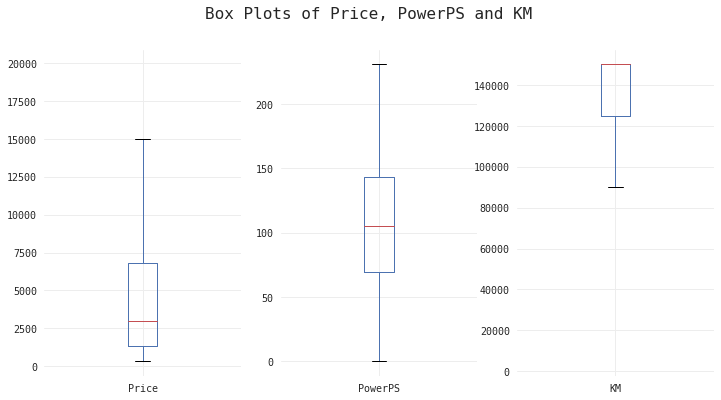

In [25]:
plt.suptitle('Box Plots of Price, PowerPS and KM', fontsize=16)
plt.subplot(1, 3, 1)
df.Price.dropna().plot(kind='box');
plt.subplot(1, 3, 2)
df.PowerPS.dropna().plot(kind='box');
plt.subplot(1, 3, 3)
df.KM.dropna().plot(kind='box');

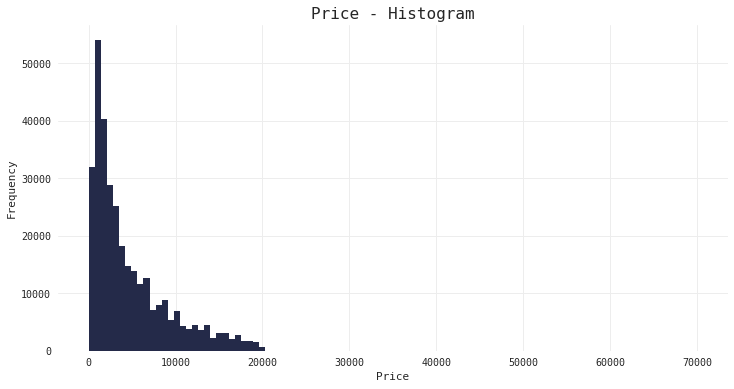

In [26]:
plt.hist(df.Price.dropna(), range=[10, 70000], bins=100, color=MC);
plt.title('Price - Histogram');
plt.xlabel('Price')
plt.ylabel('Frequency');

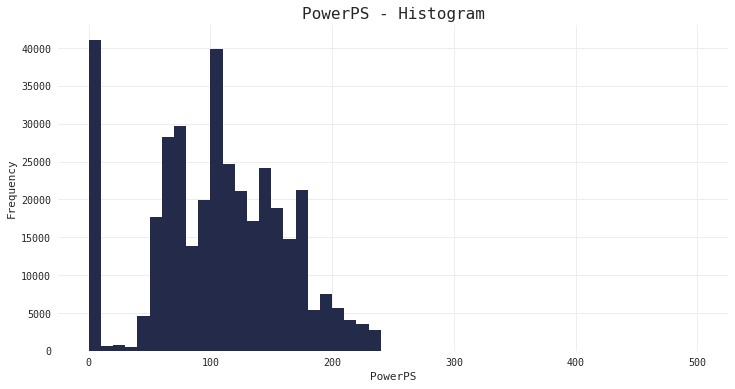

In [27]:
plt.hist(df.PowerPS.dropna(), range=[0,500], bins=50, color=MC);
plt.title('PowerPS - Histogram');
plt.xlabel('PowerPS')
plt.ylabel('Frequency');

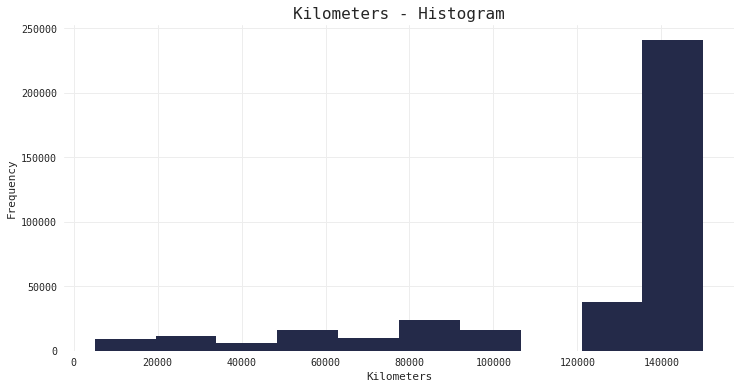

In [28]:
plt.hist(df.KM, color=MC);
plt.title('Kilometers - Histogram');
plt.xlabel('Kilometers')
plt.ylabel('Frequency');

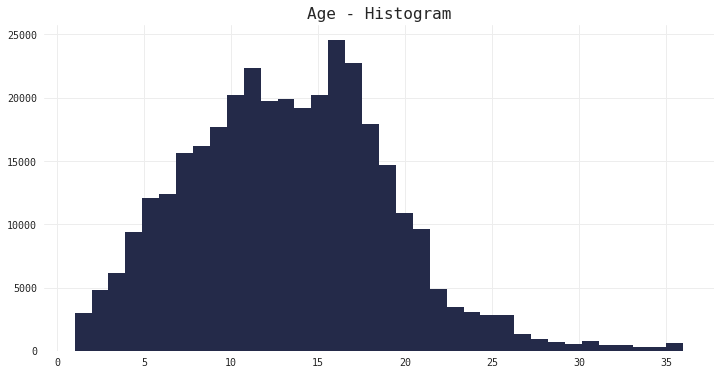

In [29]:
plt.hist(df.Age.dropna(), color=MC, bins=36);
plt.title('Age - Histogram');

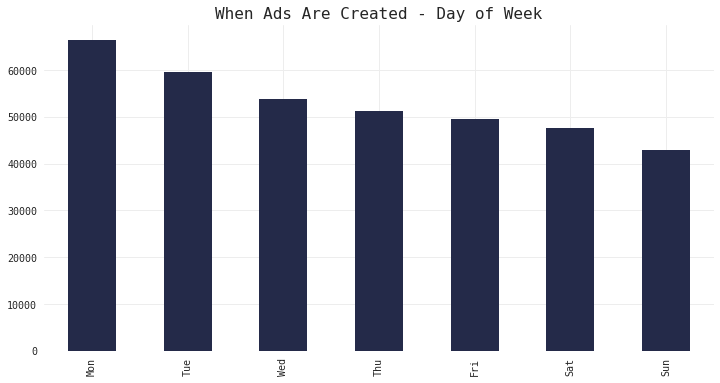

In [30]:
df.DateCreated.dt.dayofweek.value_counts().plot(kind='bar', color=MC)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.title('When Ads Are Created - Day of Week');

### Categorical Variables 

In [31]:
df.describe(include=['object']).T

,count,unique,top,freq
VehicleType,361477,7,limousine,109213
Gearbox,351319,2,manuell,274214
Model,324644,250,golf,30070
FuelType,337934,6,benzin,223857
Brand,371528,40,volkswagen,79640
Damage,299468,2,nein,263182


For categorical variables, we’ll use frequency table to understand distribution of each category.

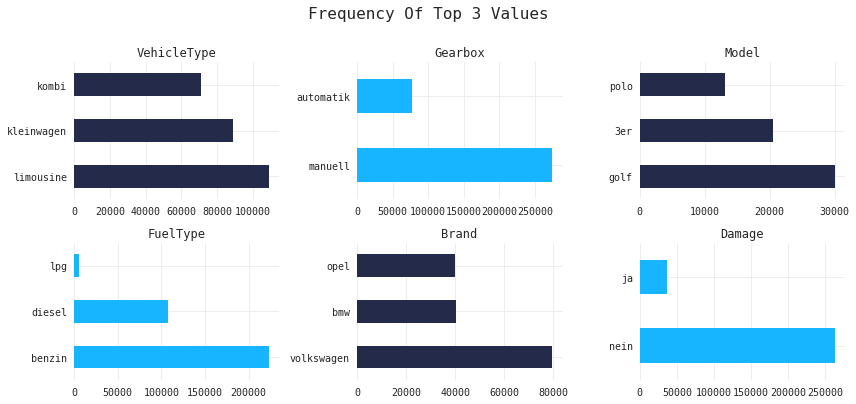

In [32]:
# Checking for top frequnet values
top_range = 3
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
plt.figure(figsize=(12, 20))
plt.suptitle('Frequency Of Top {} Values'.format(top_range), y=1.02, fontsize=16)
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col, fontsize=12)
    df[col].value_counts()[:top_range].plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]]);
    plt.tight_layout()

In [33]:
df.FuelType.value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
elektro       104
Name: FuelType, dtype: int64

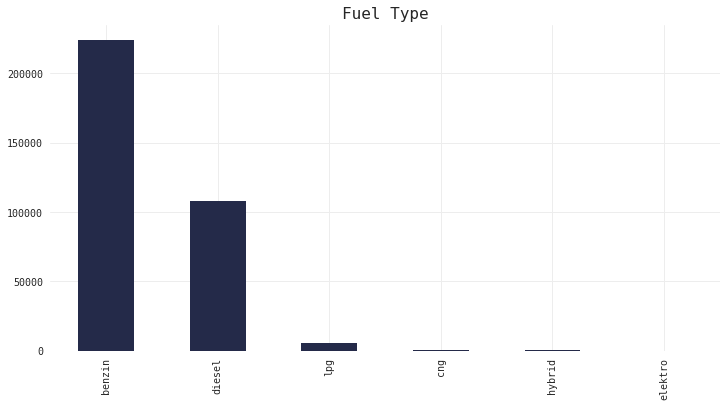

In [34]:
df.FuelType.value_counts().plot(kind='bar', color=MC)
plt.title('Fuel Type');

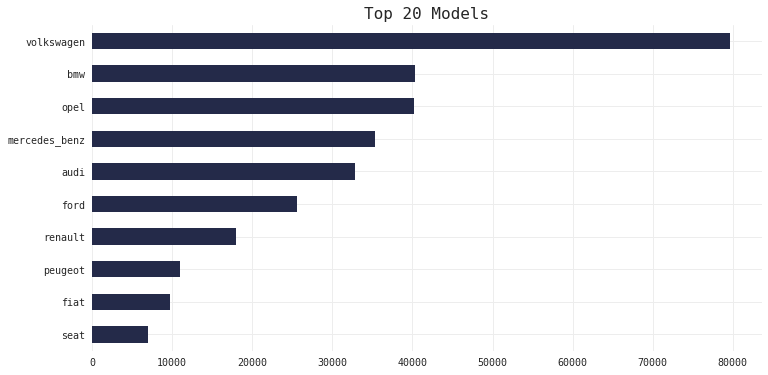

In [35]:
# plt.figure(figsize=(12, 10))
df.Brand.value_counts()[:10].sort_values(ascending=True).plot('barh', color=MC);
plt.title('Top 20 Models');

# 3. Bi-variate Analysis

### Continuous & Continuous

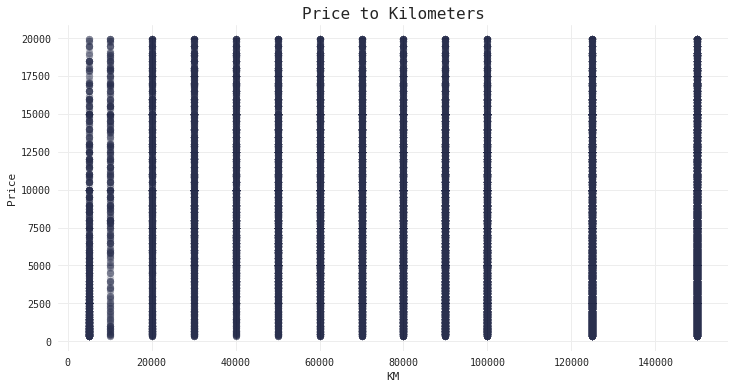

In [36]:
km_price_df = df[['KM', 'Price']][df.Price < 150000]
plt.scatter(km_price_df.KM, km_price_df.Price, color=MC, alpha=.1)
plt.xlabel('KM');
plt.ylabel('Price');
plt.title('Price to Kilometers');

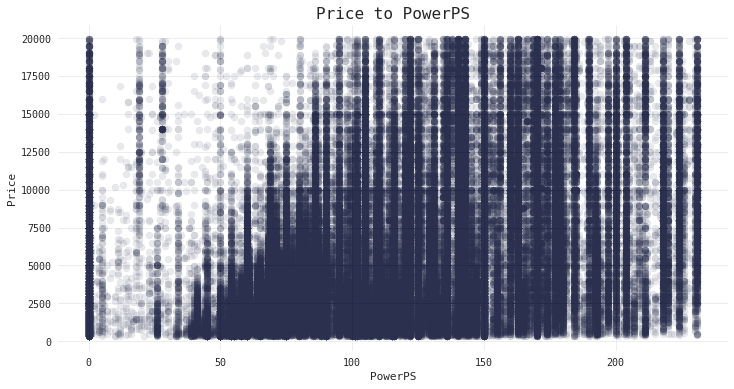

In [37]:
power_price_df = df[['PowerPS', 'Price']][df.Price < 150000]
plt.scatter(power_price_df.PowerPS, power_price_df.Price, color=MC, alpha=.1)
plt.xlabel('PowerPS');
plt.ylabel('Price');
plt.title('Price to PowerPS');

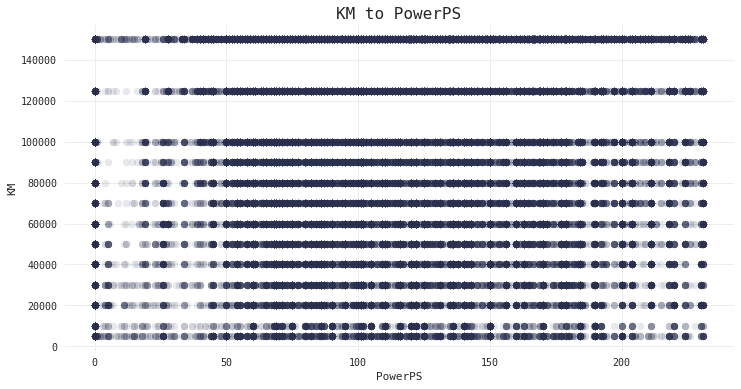

In [38]:
power_km_df = df[['KM', 'PowerPS']]
plt.scatter(power_km_df.PowerPS, power_km_df.KM, color=MC, alpha=.1)
plt.xlabel('PowerPS');
plt.ylabel('KM');
plt.title('KM to PowerPS');

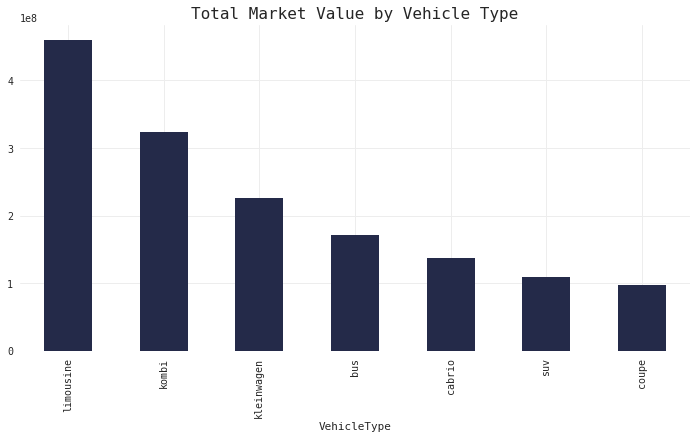

In [39]:
df.groupby('VehicleType').Price.sum().sort_values(ascending=False).plot(kind='bar', color=MC);
plt.title('Total Market Value by Vehicle Type');

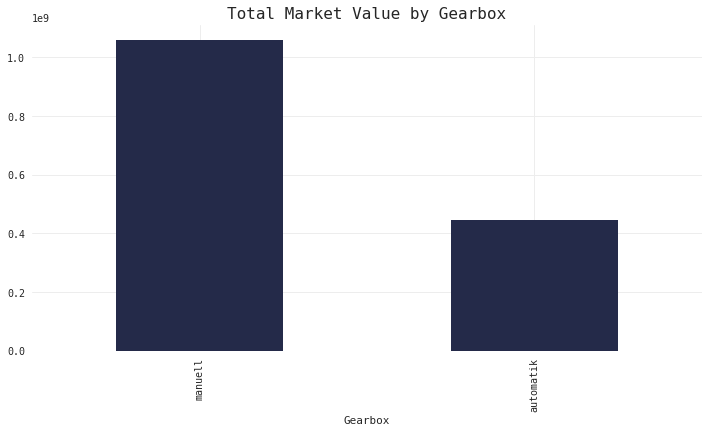

In [40]:
df.groupby('Gearbox').Price.sum().sort_values(ascending=False).plot(kind='bar', color=MC);
plt.title('Total Market Value by Gearbox');

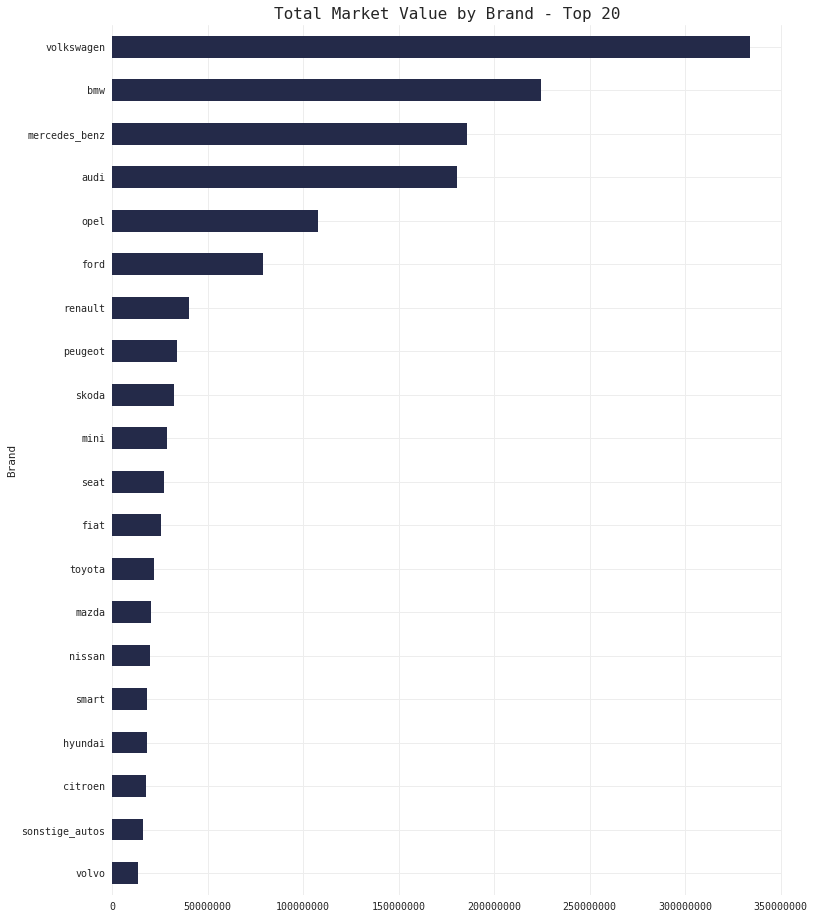

In [41]:
plt.figure(figsize=(12, 16))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
df.groupby('Brand').Price.sum().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color=MC);
plt.title('Total Market Value by Brand - Top 20');

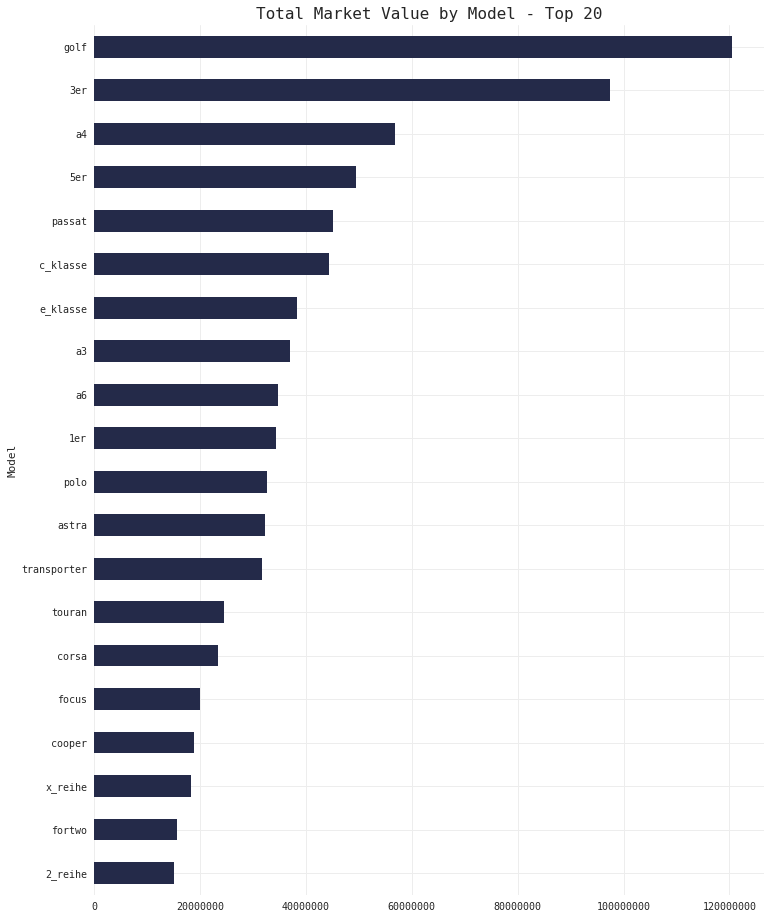

In [42]:
plt.figure(figsize=(12, 16))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
df.groupby('Model').Price.sum().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color=MC);
plt.title('Total Market Value by Model - Top 20');

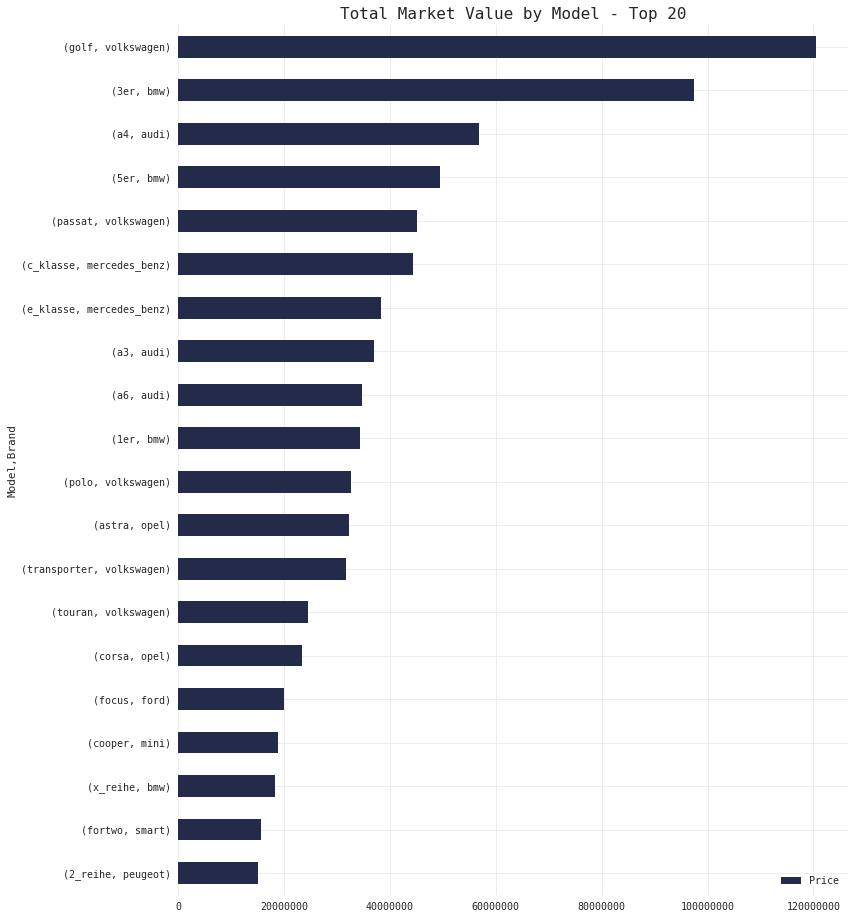

In [43]:
plt.figure(figsize=(12, 16))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
df.groupby(['Model', 'Brand']).Price.sum().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color=MC);
plt.legend()
plt.title('Total Market Value by Model - Top 20');

In [44]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'Year', 'Gearbox', 'PowerPS',
       'Model', 'KM', 'Month', 'FuelType', 'Brand', 'Damage', 'DateCreated',
       'PostalCode', 'LastSeen', 'Age'],
      dtype='object')

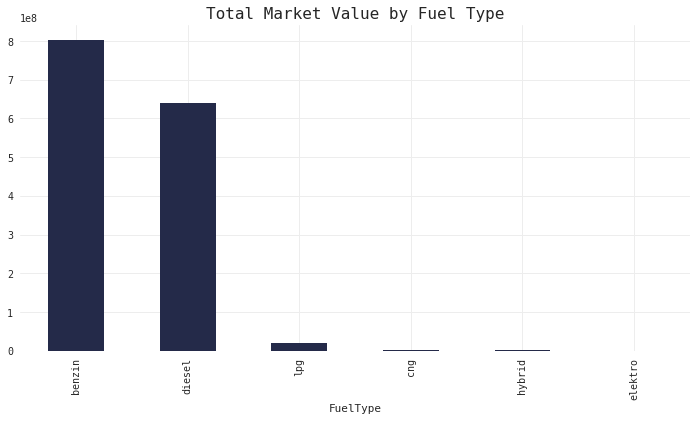

In [45]:
df.groupby('FuelType').Price.sum().sort_values(ascending=False).plot(kind='bar', color=MC);
plt.title('Total Market Value by Fuel Type');

#### Correlations

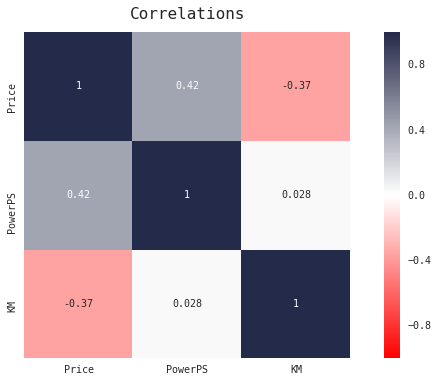

In [46]:
sns.heatmap(df[['Price', 'PowerPS', 'KM']].corr(), cmap=cmap, square=True, annot=True)
plt.title('Correlations', y=1.02);

### Categorical & Categorical

Name, VehicleType, Gearbox, Model, FuelType,
                    Brand, NotRepairedDemage

In [47]:
top_10_brands = df.Brand.value_counts()[:10].index
top_20_models = df.Model.value_counts()[:20].index

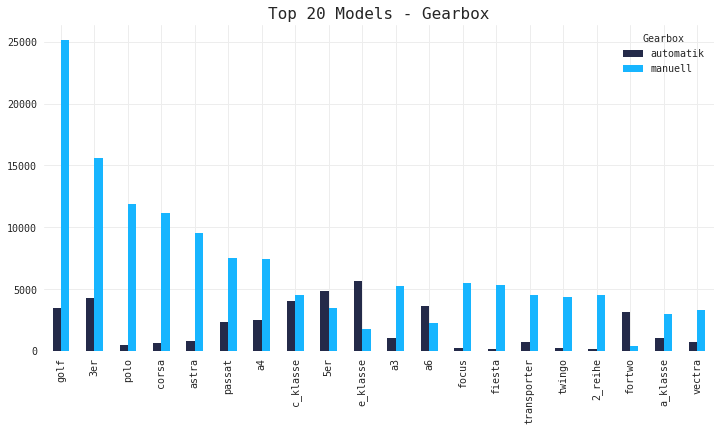

In [48]:
# Two-way table
pd.crosstab(df.Model, df.Gearbox, ).loc[top_20_models, :].plot(kind='bar', color=colors)
plt.title('Top 20 Models - Gearbox')

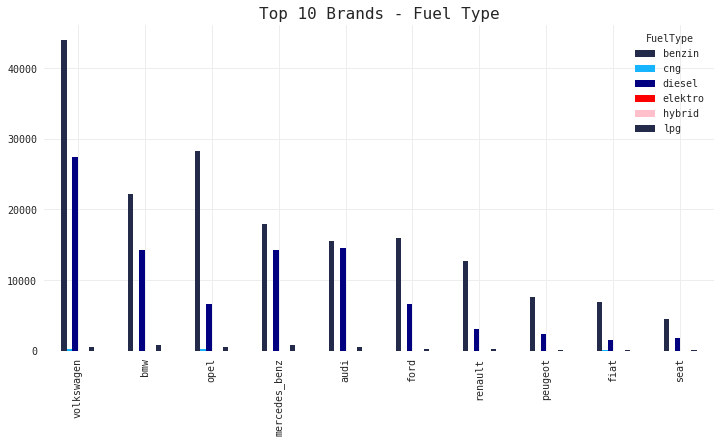

In [49]:
pd.crosstab(df.Brand, df.FuelType).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Fuel Type');

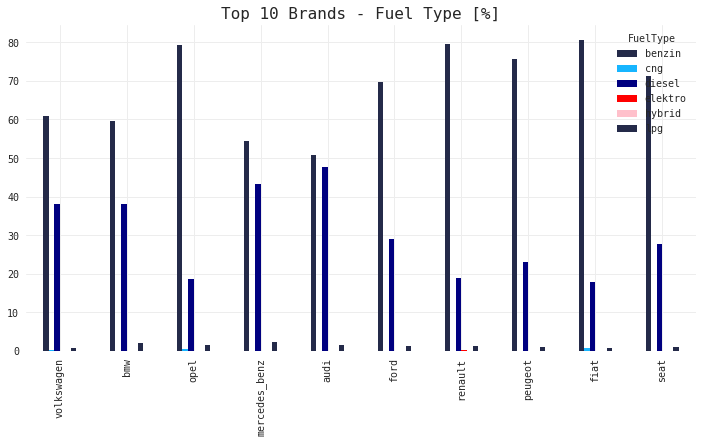

In [50]:
pd.crosstab(df.Brand, df.FuelType).apply(lambda x: x/x.sum() *100, axis=1).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Fuel Type [%]');

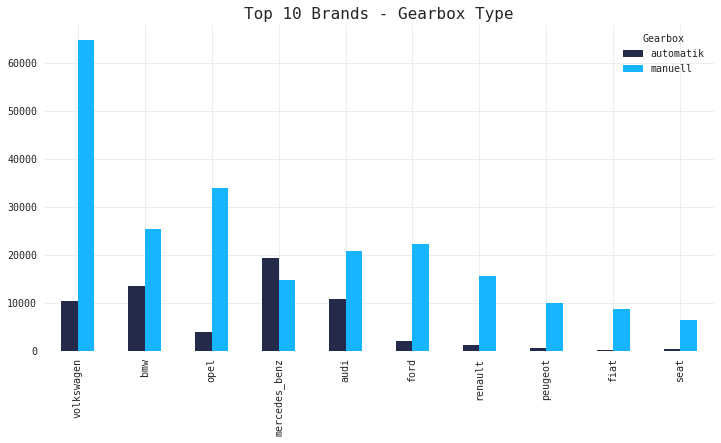

In [51]:
pd.crosstab(df.Brand, df.Gearbox).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Gearbox Type');

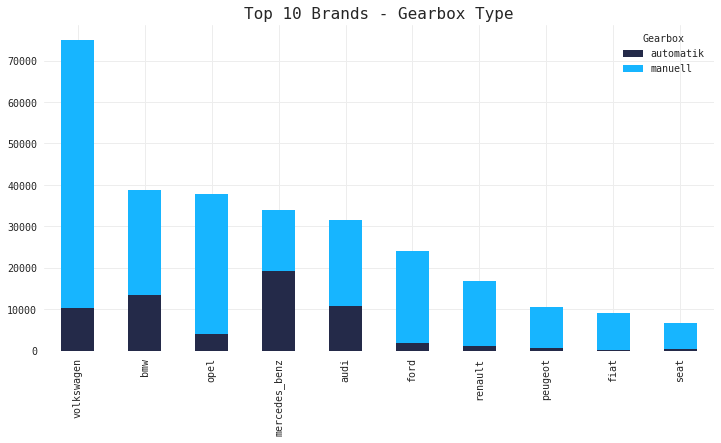

In [52]:
pd.crosstab(df.Brand, df.Gearbox).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors, stacked=True)
plt.title('Top 10 Brands - Gearbox Type');

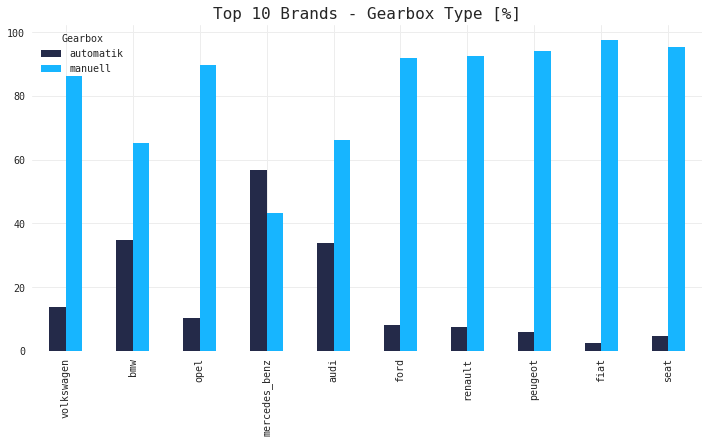

In [53]:
pd.crosstab(df.Brand, df.Gearbox).apply(lambda x: x/x.sum() * 100, axis=1) \
    .loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Gearbox Type [%]');

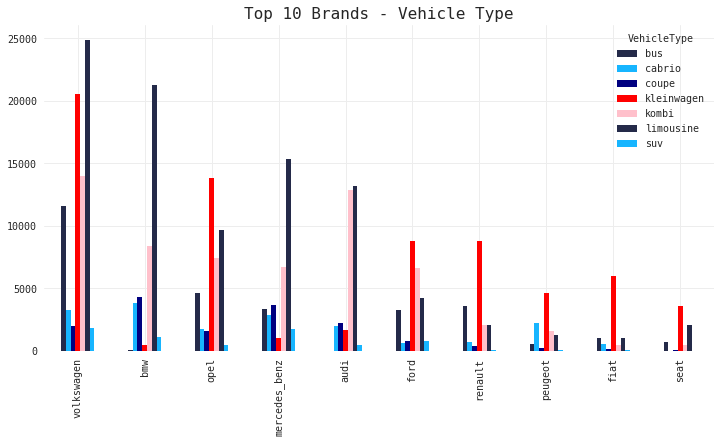

In [54]:
pd.crosstab(df.Brand, df.VehicleType).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Vehicle Type');

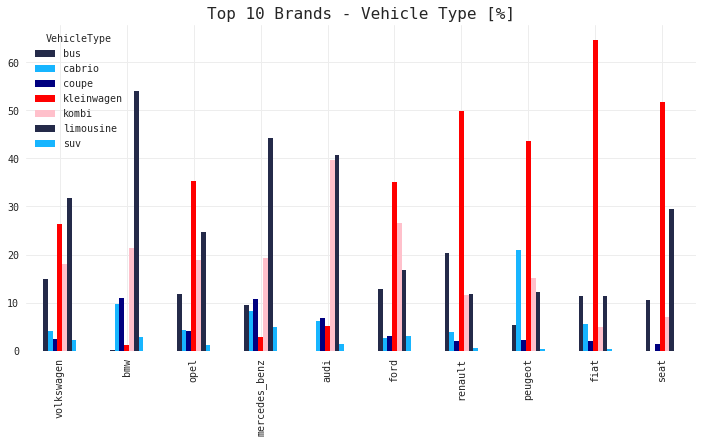

In [55]:
pd.crosstab(df.Brand, df.VehicleType) \
    .apply(lambda x: x/x.sum() * 100, axis=1) \
    .loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Vehicle Type [%]');

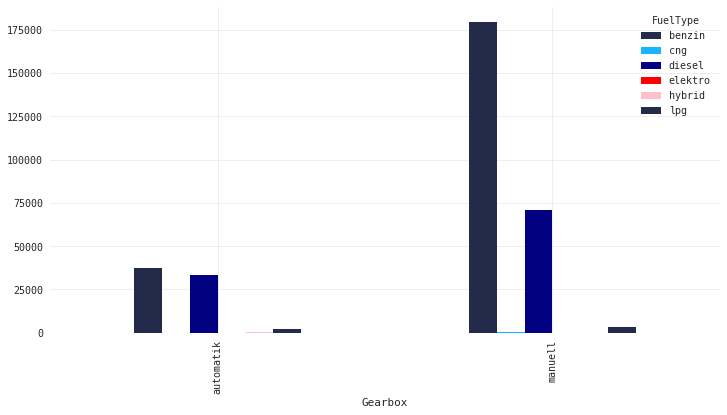

In [56]:
pd.crosstab(df.Gearbox, df.FuelType).plot(kind='bar', color=colors);

In [57]:
# Chi-Square Test

### Categorical & Continuous

# Playground

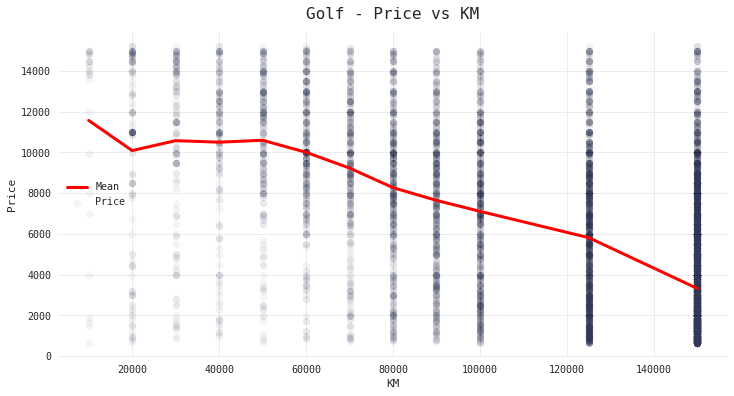

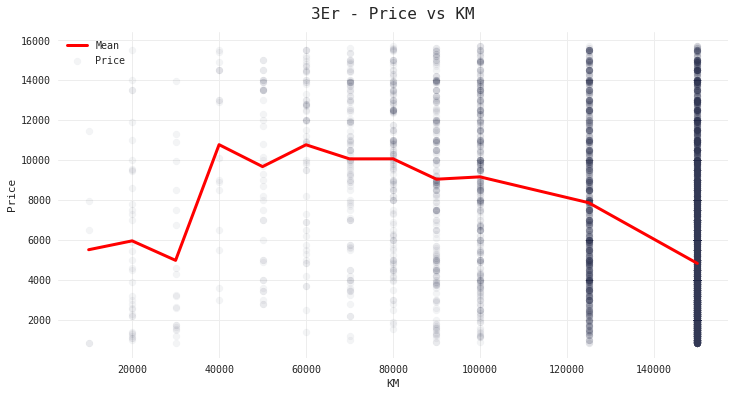

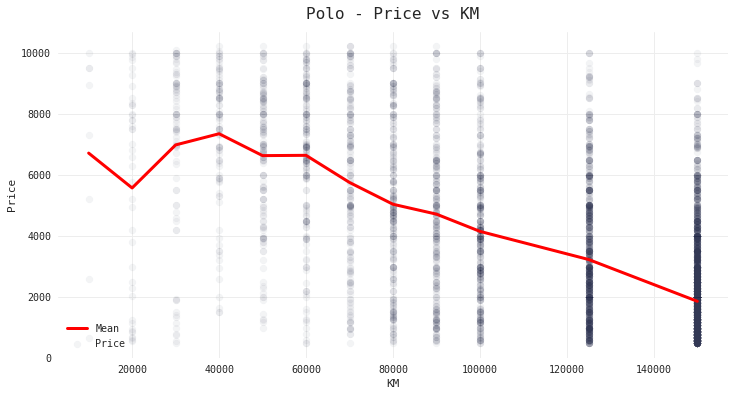

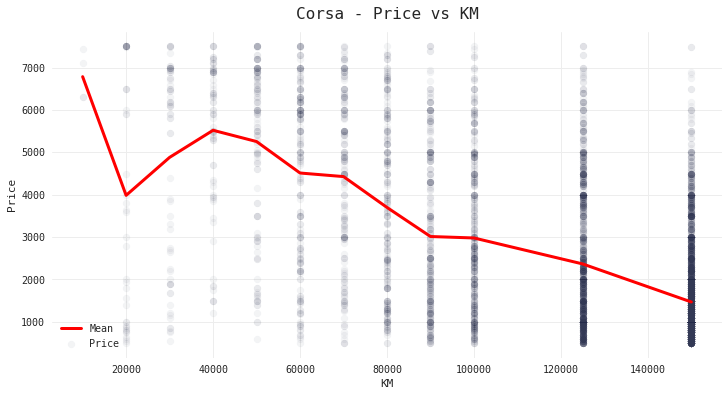

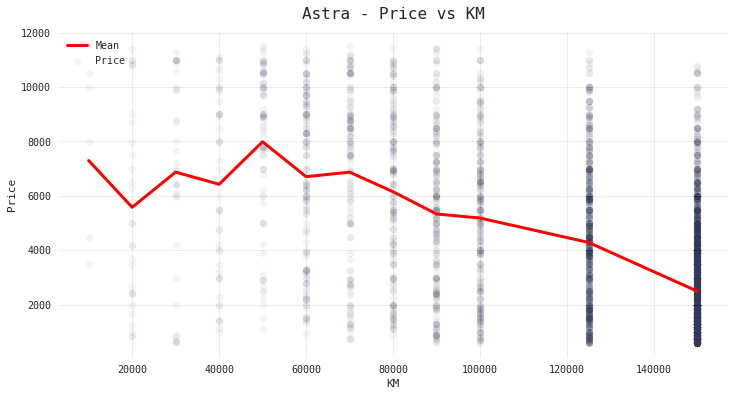

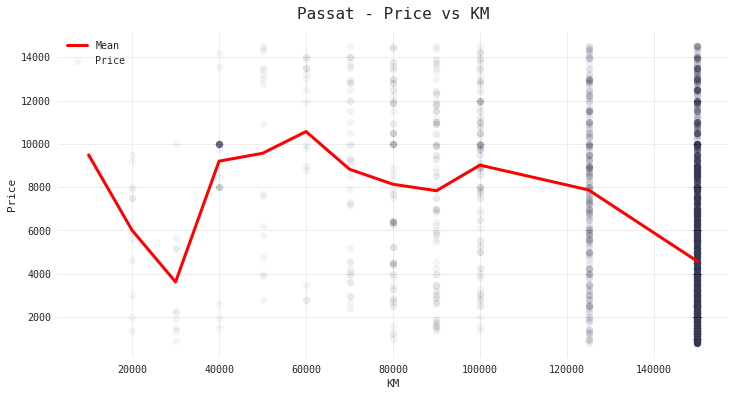

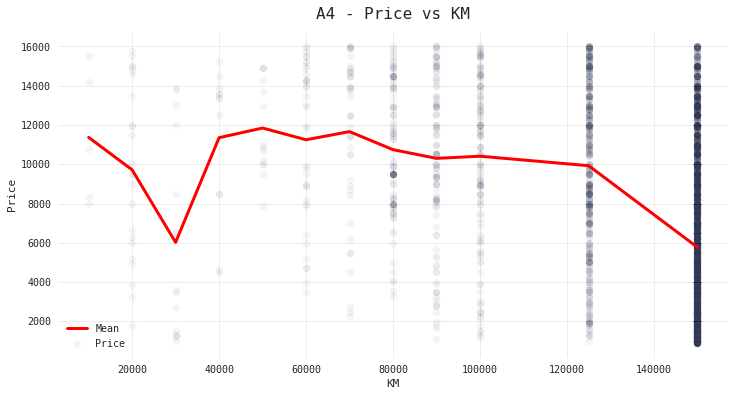

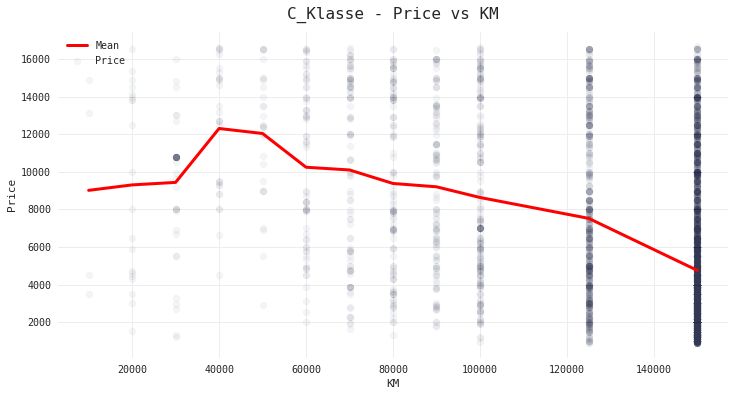

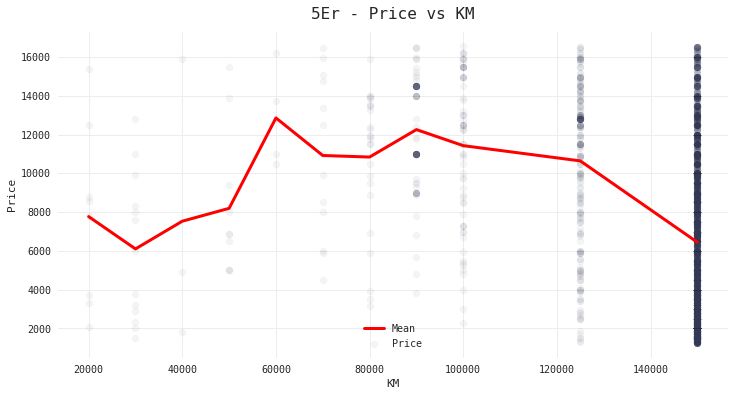

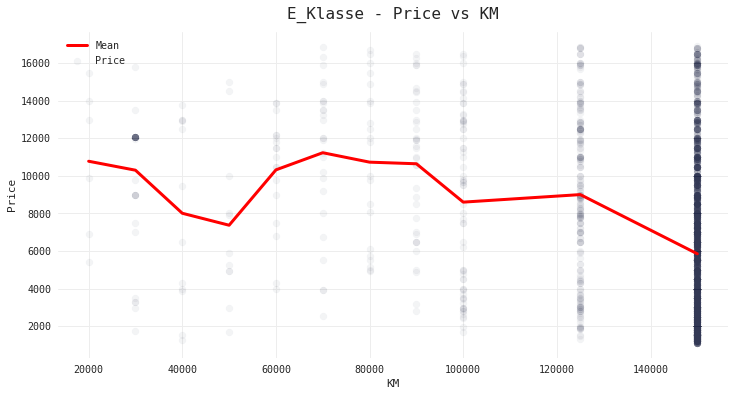

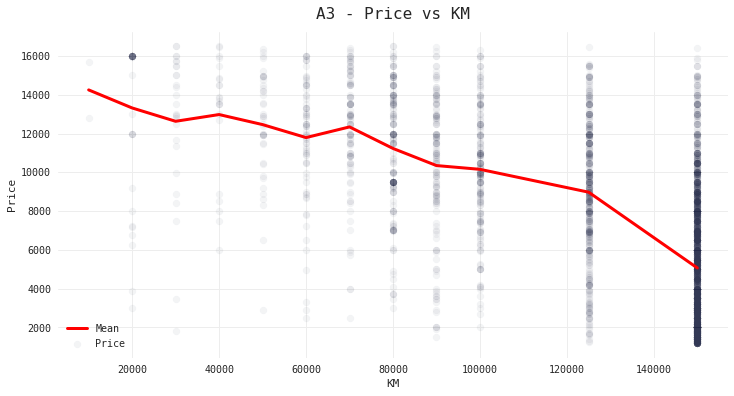

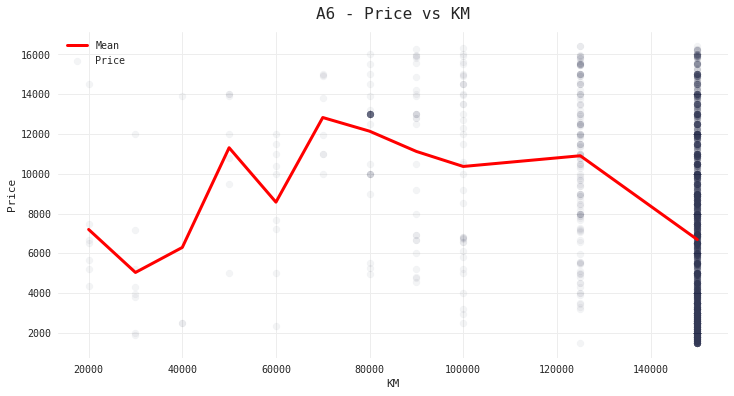

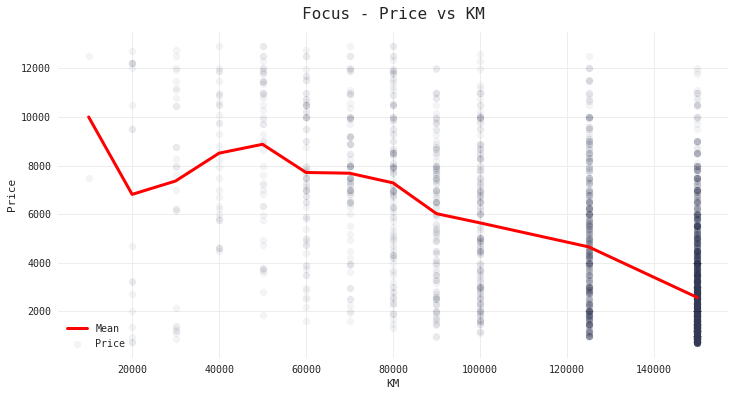

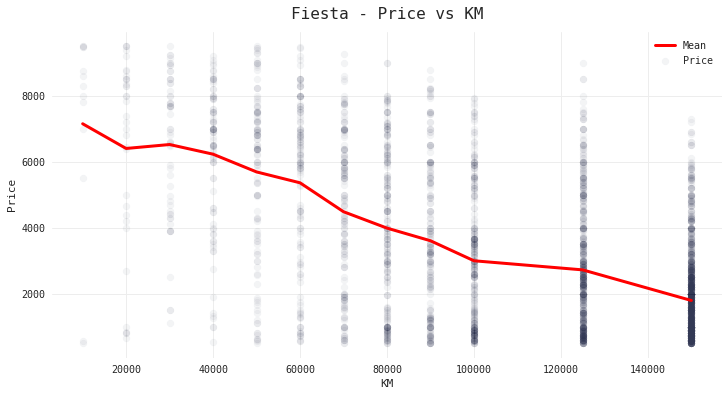

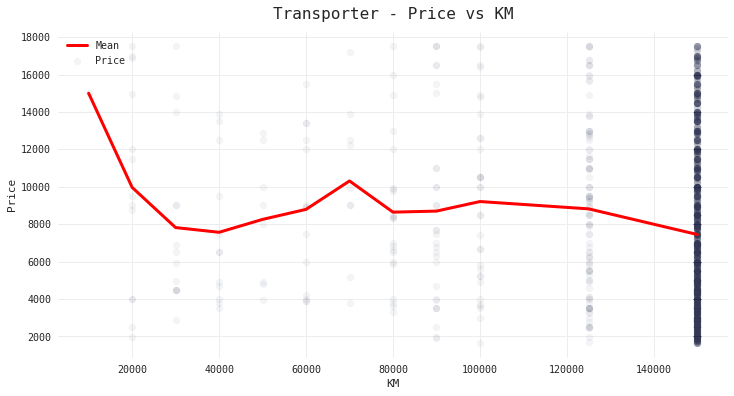

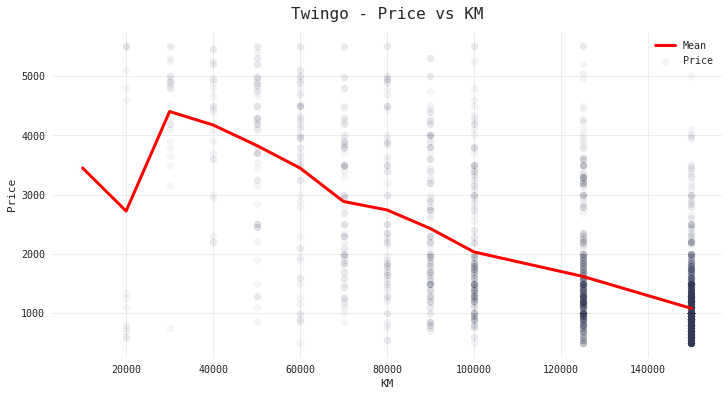

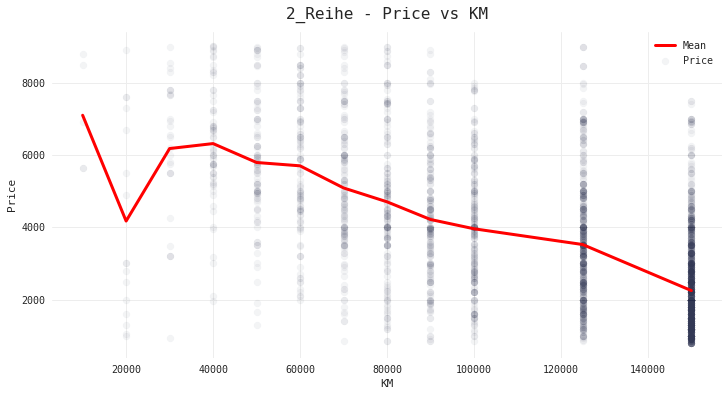

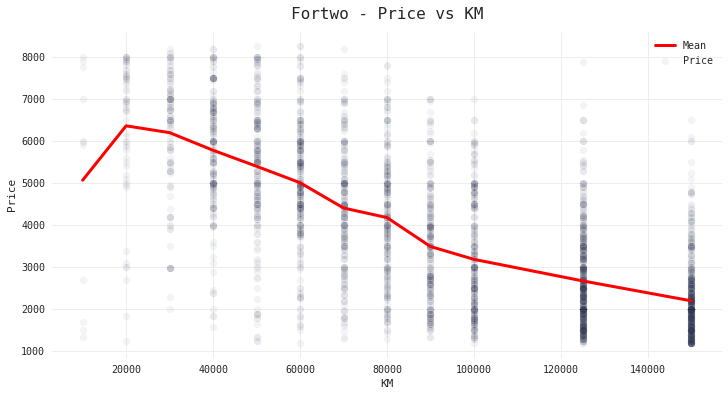

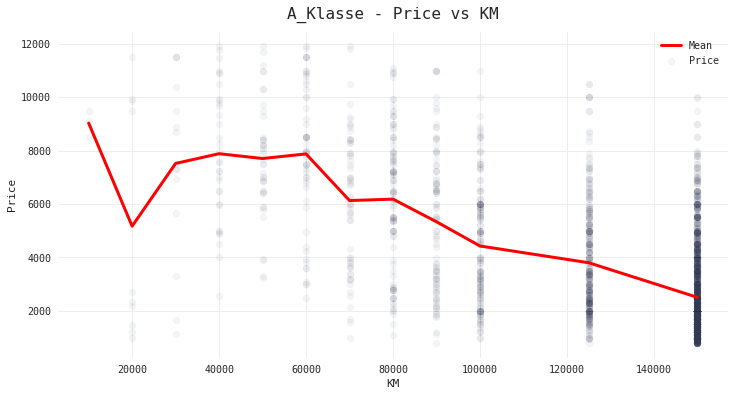

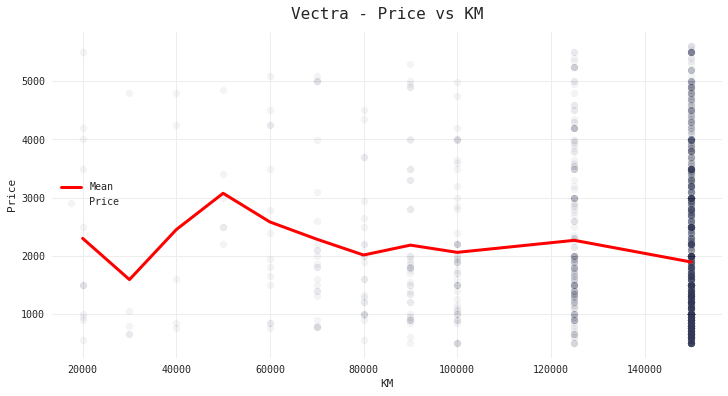

In [58]:
for model in top_20_models:

    temp_df = df[(df.Model == model) & (df.KM > 5000) & (df.Damage == 'nein')]
    # Takes care of price outliers
    p_min = temp_df.Price.quantile(.05)
    p_max = temp_df.Price.quantile(.95)
    temp_df = temp_df[temp_df.Price.between(p_min, p_max)]

    plt.scatter(temp_df.KM, temp_df.Price, color=MC, alpha=.05)
    plt.xlabel('KM')
    plt.ylabel('Price')
    plt.title('{} - Price vs KM'.format(model.title()), y=1.02);
    temp_df.groupby('KM')['Price'].mean().plot(color='red', linewidth=3, label='Mean')
    plt.legend()
    plt.show()

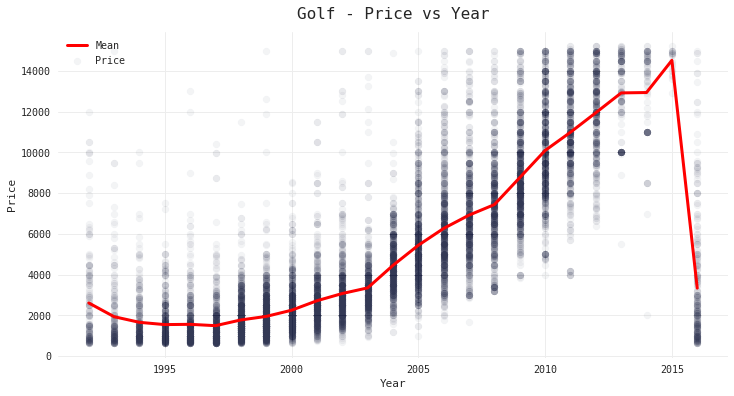

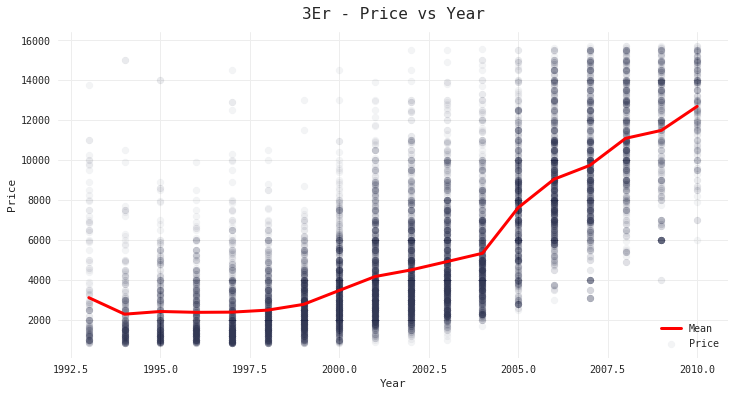

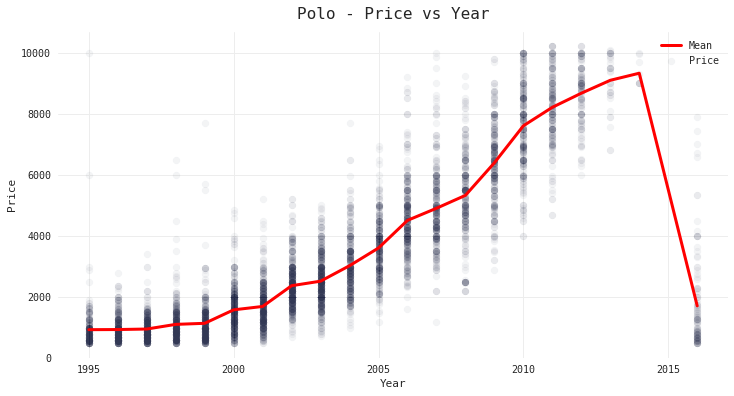

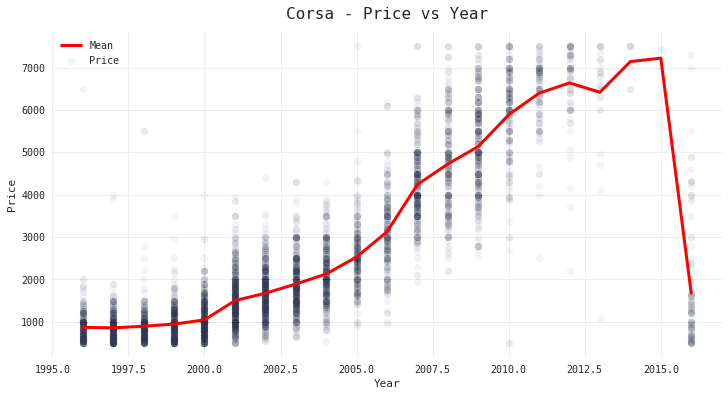

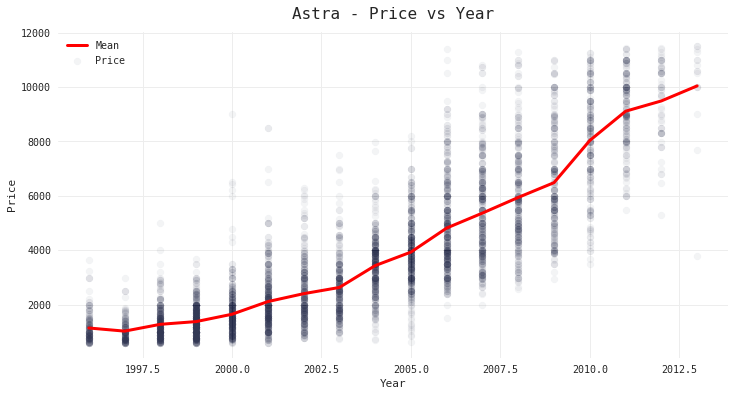

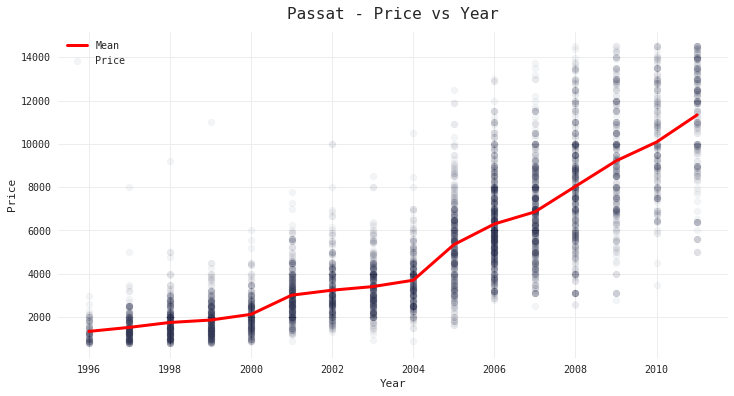

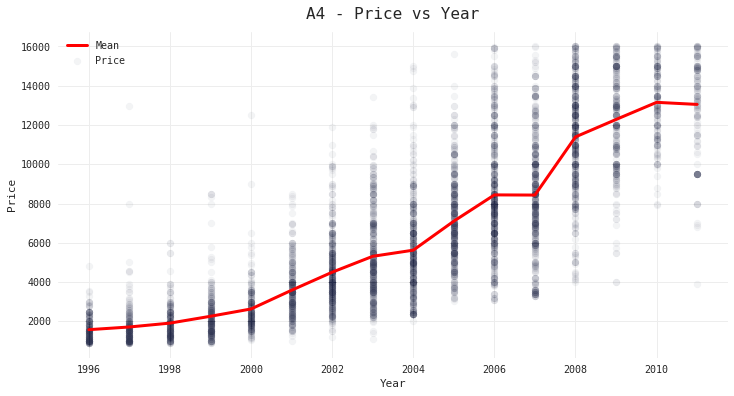

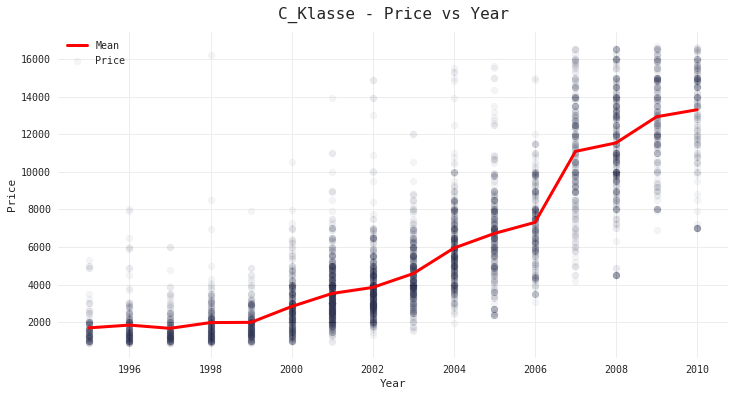

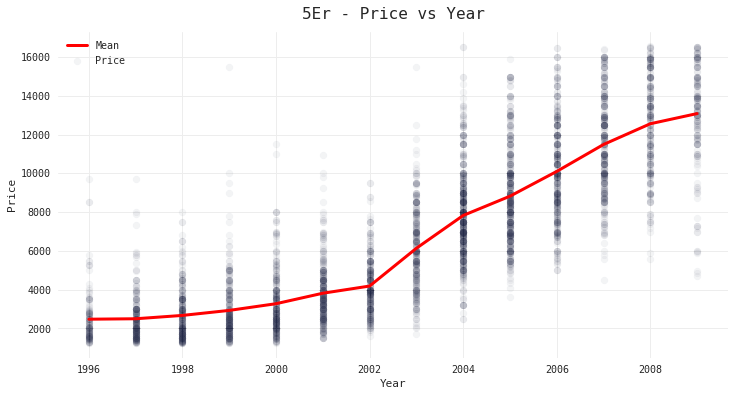

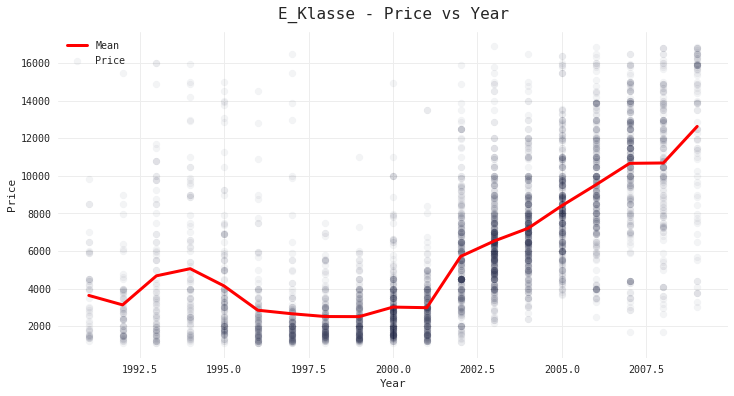

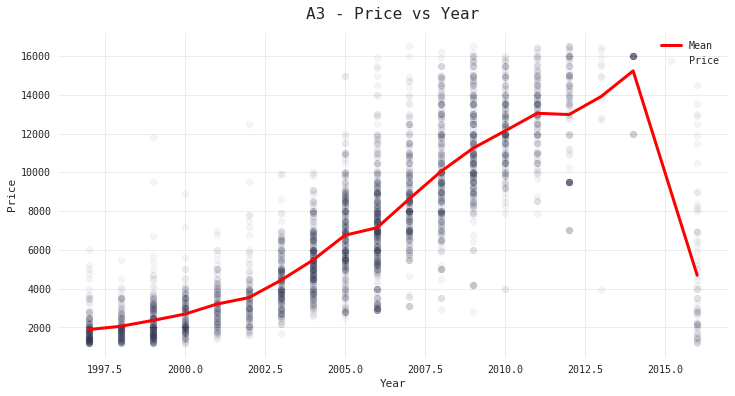

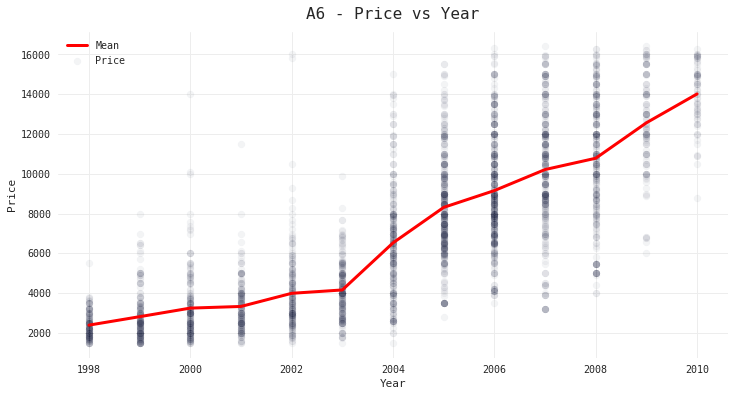

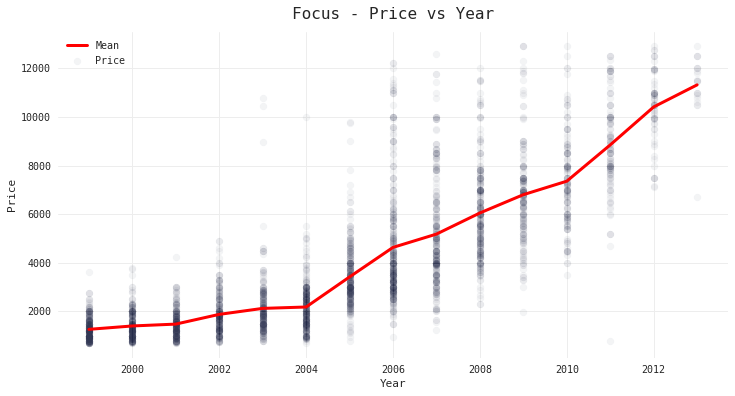

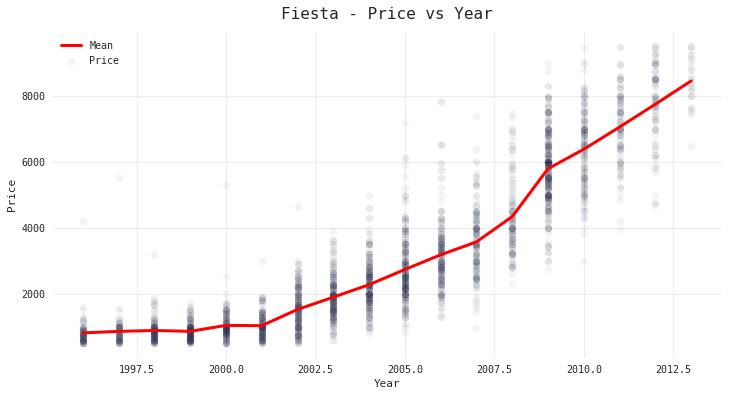

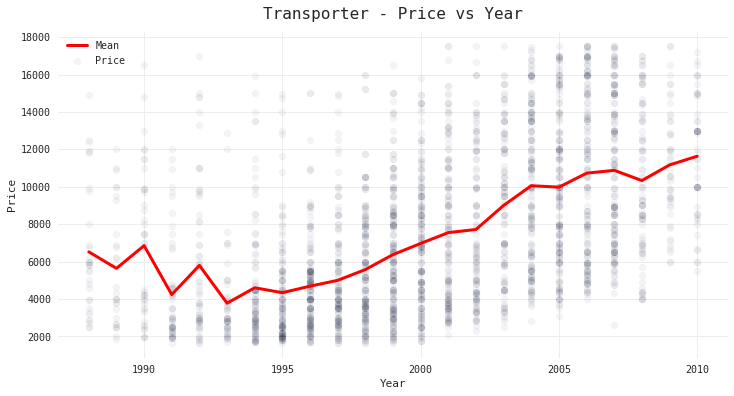

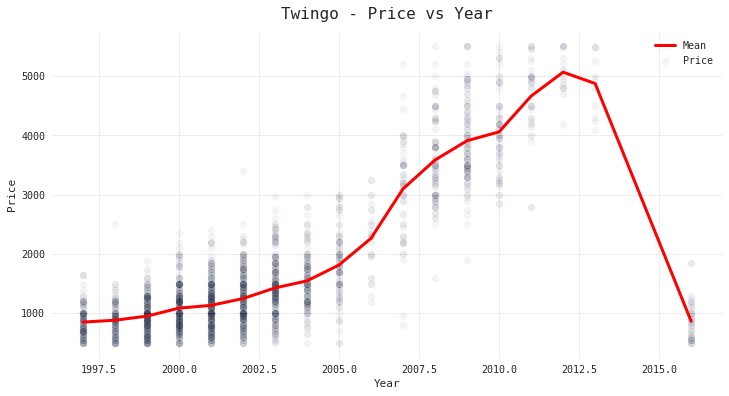

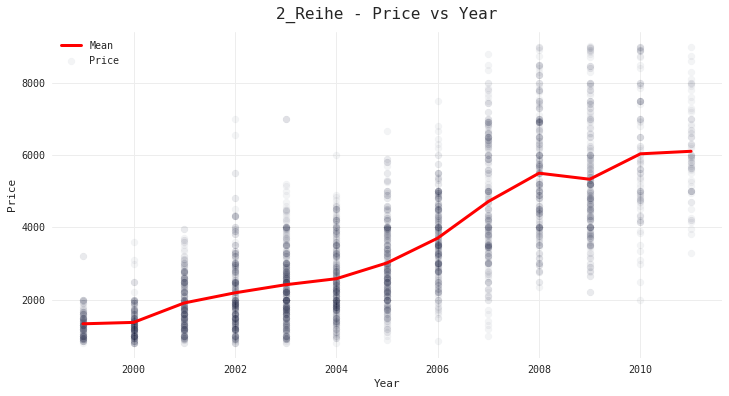

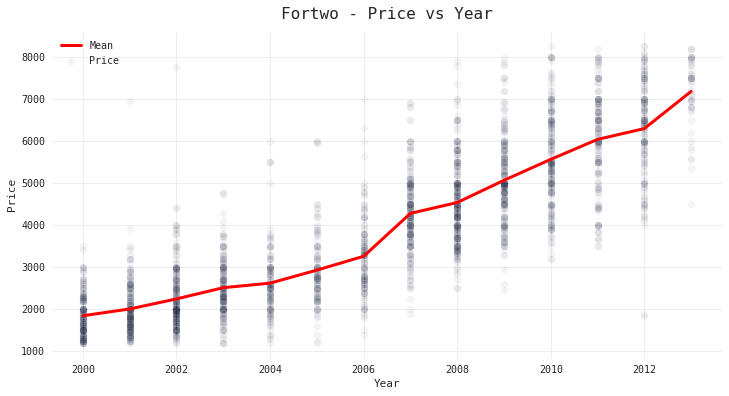

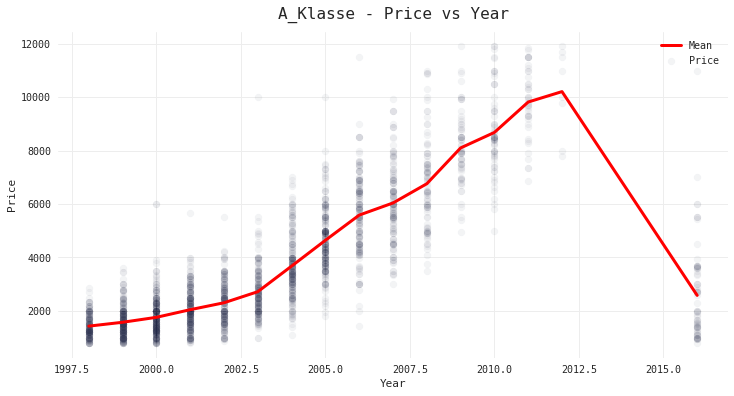

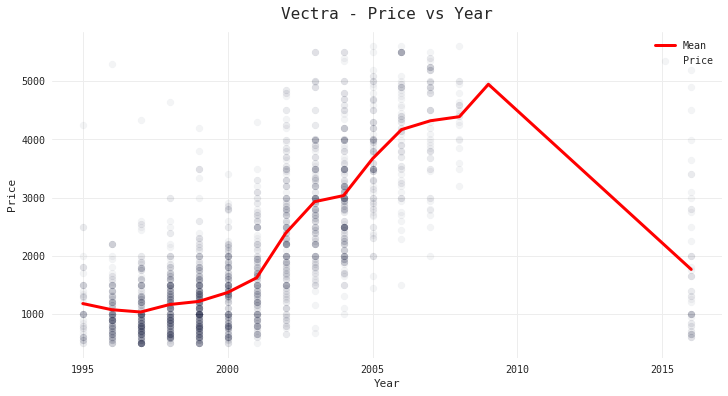

In [59]:
for model in top_20_models:

    temp_df = df[(df.Model == model) & (df.KM > 5000) & (df.Damage == 'nein')]
    # Takes care of price outliers
    p_min = temp_df.Price.quantile(.05)
    p_max = temp_df.Price.quantile(.95)
    temp_df = temp_df[temp_df.Price.between(p_min, p_max)]
    p_min = temp_df.Year.quantile(.05)
    p_max = temp_df.Year.quantile(.95)
    temp_df = temp_df[temp_df.Year.between(p_min, p_max)]

    plt.scatter(temp_df.Year, temp_df.Price, color=MC, alpha=.05)
    plt.xlabel('KM')
    plt.ylabel('Price')
    plt.title('{} - Price vs Year'.format(model.title()), y=1.02);
    temp_df.groupby('Year')['Price'].mean().plot(color='red', linewidth=3, label='Mean')
    plt.legend()
    plt.show()

### Outlier tests

In [66]:
golf_price = df.Price[df.Model == 'golf']

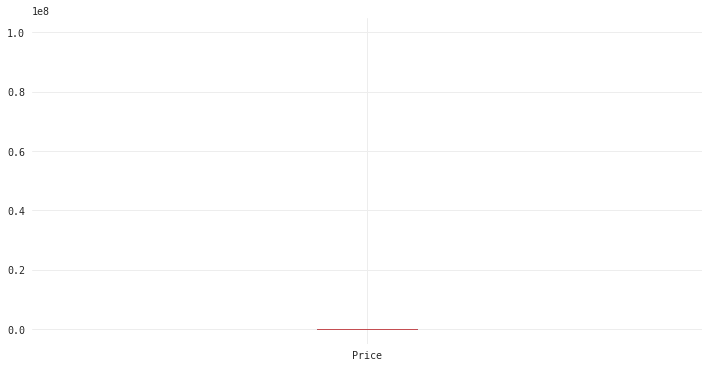

In [67]:
golf_price.plot(kind='box')

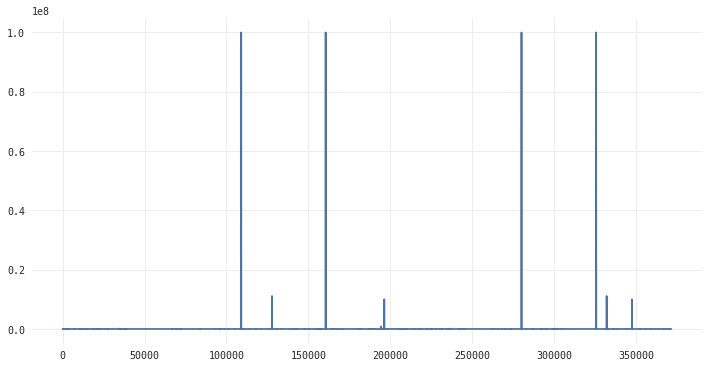

In [68]:
golf_price.plot()

### Outlier Detection - Rolling Median 

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=True).median()
  


(0, 119999998.8)

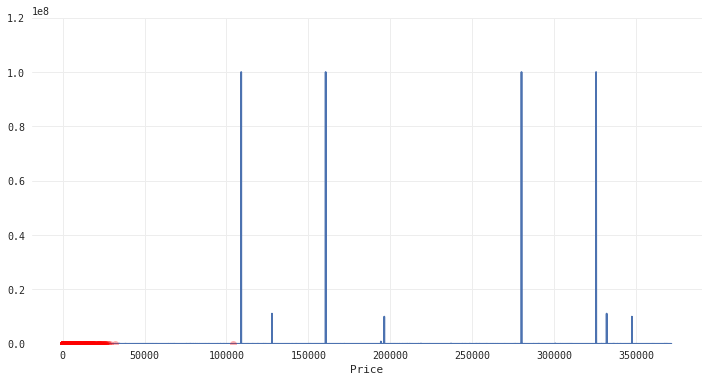

In [79]:
threshold = 1
p = pd.rolling_median(golf_price, window=3, center=True).fillna(method='bfill').fillna(method='ffill')
dif = np.abs(golf_price - p)
outlier_idx = dif - threshold
outlier_idx
fig, ax = plt.subplots()
golf_price.plot()

golf_price[outlier_idx].plot(**kw)
plt.ylim([0, golf_price.max() * 1.2])

### Outlier Detection - Outlier Position by FFT

In [89]:
def detect_outlier_position_by_fft(signal, threshold_freq=.1,
                                  frequency_aplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[threshold_freq:]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None
    
outlier_idx = []

y = golf_price.values

opt = dict(threshold_freq=0.01, frequency_aplitude=0.001)

win = 20
for k in range(win*2, y.size, win):
    idx = detect_outlier_position_by_fft(y[k-win:k+win], **opt)
    if idx is not None:
        outlier_idx.append(k + idx[0] - win)
outlier_idx = list(set(outlier_idx))

fig, ax = plt.subplots()

golf_price.plot()
golf_price[outlier_idx].plot(**kw)
plt.ylim([0, golf_price.max() * 1.2])

TypeError: slice indices must be integers or None or have an __index__ method

### Outlier Detection - Median Filltered

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


(0, 119999998.8)

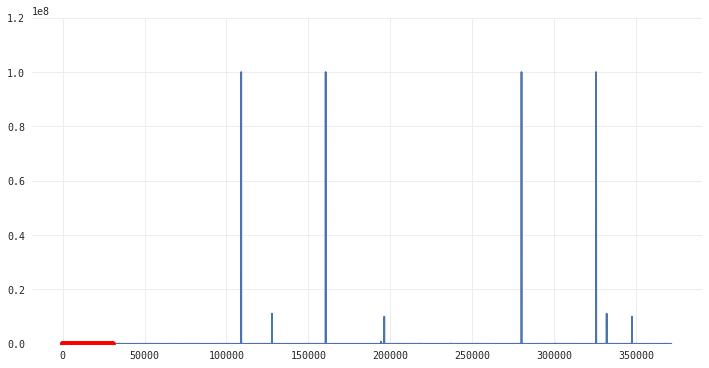

In [131]:
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

median_filtered = get_median_filtered(golf_price, threshold=3)

outliers_idx = np.where(golf_price.values != median_filtered)[0]

fig, ax = plt.subplots()
golf_price.plot()
golf_price[outliers_idx].plot(**kw)
plt.ylim([0, golf_price.max() * 1.2])

In [132]:
golf_price_clean = golf_price.drop(outliers_idx, axis=0)
plt.figure(figsize=(12, 12))
plt.subplot(211)
golf_price_clean.plot(kind='kde')
plt.xlim([0, golf_price_clean.max() * 1.2])
plt.subplot(212)
sns.boxplot(golf_price_clean)
plt.xlim([0, golf_price_clean.max() * 1.2])

ValueError: labels [   18    21    26 ..., 30049 30061 30066] not contained in axis

### Outlier Detection IRQ Rule

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 119999998.8)

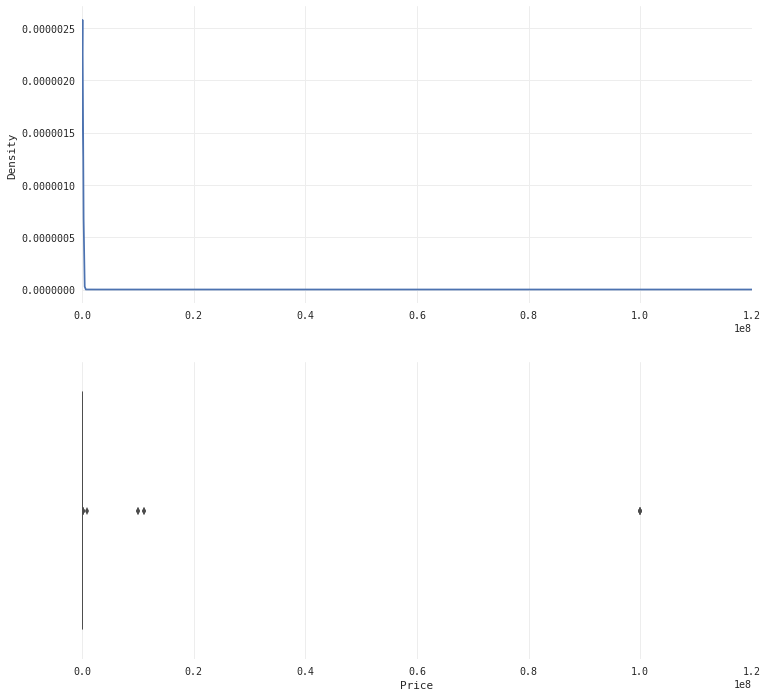

In [94]:
plt.figure(figsize=(12, 12))
plt.subplot(211)
golf_price.plot(kind='kde')
plt.xlim([0, golf_price.max() * 1.2])
plt.subplot(212)
sns.boxplot(golf_price)
plt.xlim([0, golf_price.max() * 1.2])

2152 30070


(0, 119999998.8)

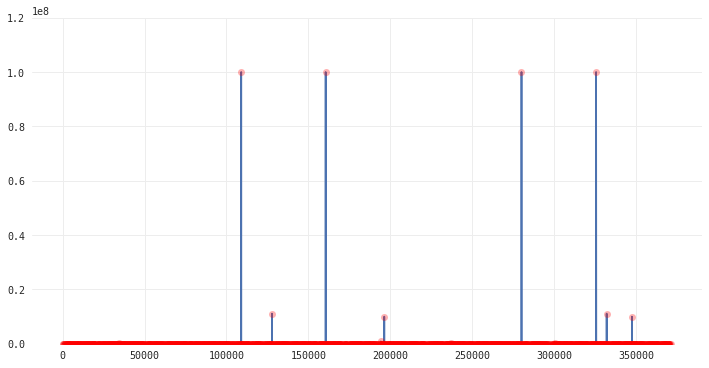

In [120]:
q75 = golf_price.quantile(.75)
q25 = golf_price.quantile(.25)
iqr = q75 - q25
iqr
p_min = q25 - (iqr * 1.5)
p_max = q75 + (iqr * 1.5)

outliers_idx = golf_price[(golf_price < p_min) | (golf_price > p_max)].index
print(len(outliers_idx), len(golf_price))
golf_price.plot()
golf_price[outliers_idx].plot(**kw)
plt.ylim([0, golf_price.max() * 1.2])

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 17580.0)

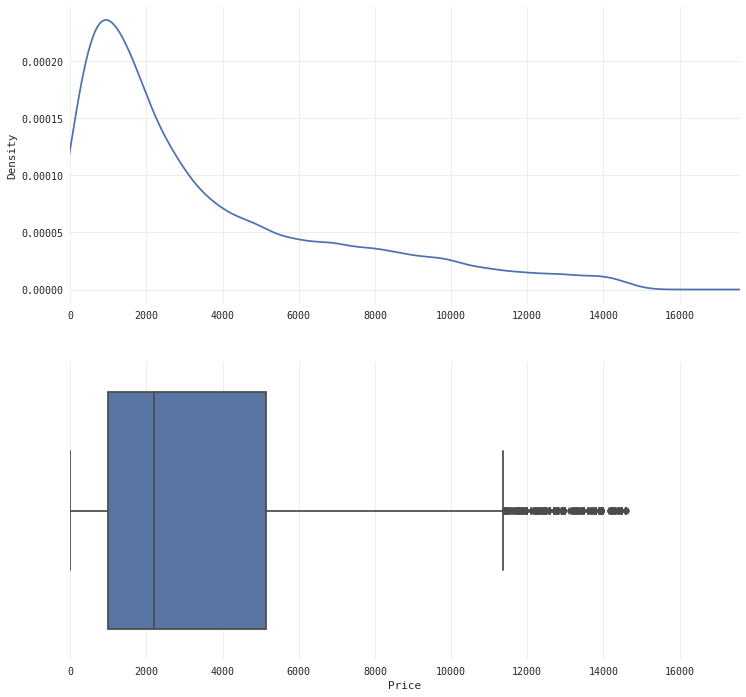

In [124]:
golf_price_clean = golf_price.drop(outliers_idx, axis=0)
plt.figure(figsize=(12, 12))
plt.subplot(211)
golf_price_clean.plot(kind='kde')
plt.xlim([0, golf_price_clean.max() * 1.2])
plt.subplot(212)
sns.boxplot(golf_price_clean)
plt.xlim([0, golf_price_clean.max() * 1.2])

### Outlier Detection: Cutting off below 5 and above 95 percentile

2392 30070


(0, 119999998.8)

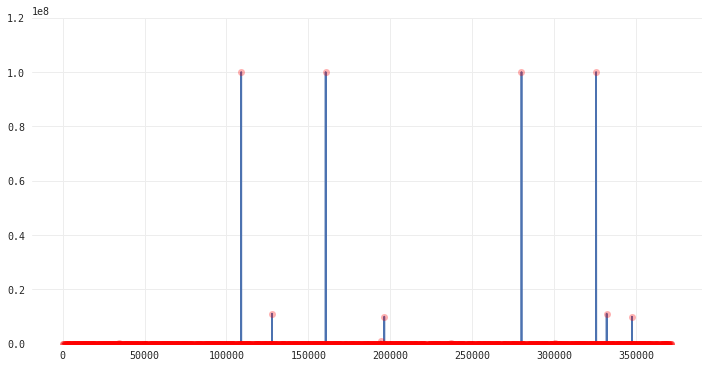

In [125]:
p_min = df.Price.quantile(.05)
p_max = df.Price.quantile(.95)
outliers_idx = golf_price[(golf_price > p_max) | (golf_price < p_min)].index
print(len(outliers_idx), len(golf_price))
golf_price.plot()
golf_price[outliers_idx].plot(**kw)
plt.ylim([0, golf_price.max() * 1.2])

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 23736.0)

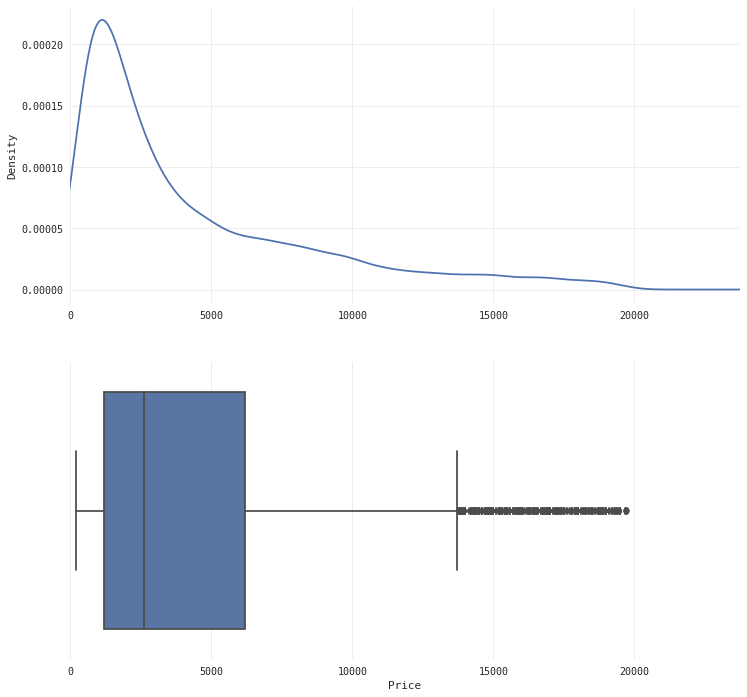

In [126]:
golf_price_clean = golf_price.drop(outliers_idx, axis=0)
plt.figure(figsize=(12, 12))
plt.subplot(211)
golf_price_clean.plot(kind='kde')
plt.xlim([0, golf_price_clean.max() * 1.2])
plt.subplot(212)
sns.boxplot(golf_price_clean)
plt.xlim([0, golf_price_clean.max() * 1.2])